+--------------------+--------------+
|               cause|Total_Affected|
+--------------------+--------------+
|               Total|          8060|
|Causes other than...|          2773|
|           Landslide|           269|
|           Avalanche|            29|
|     Torrential Rain|            89|
|             Tsunami|             0|
|            Epidemic|             0|
|           Lightning|          2887|
|             Tornado|             0|
|         Forest Fire|             7|
|             Cyclone|             9|
|          Earthquake|             0|
|               Flood|           547|
|    Exposure to cold|           720|
|     Heat/Sun Stroke|           730|
+--------------------+--------------+

+--------------------+----------------+
|               cause|Percentage_Share|
+--------------------+----------------+
|               Total|           100.0|
|Causes other than...|            34.4|
|           Landslide|             3.3|
|           Avalanche|             0.

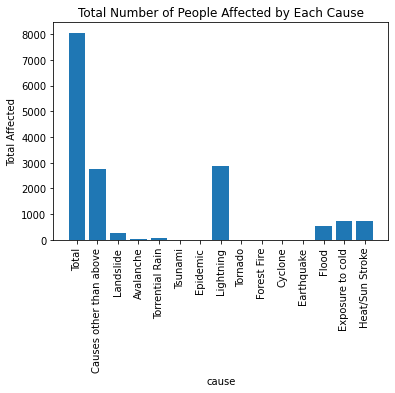

Sl. No.,Cause,Below 14 years - Male,Below 14 years - Female,Below 14 years - Transgender,Below 14 years - Total,14 and Above - Below 18 years - Male,14 and Above - Below 18 years - Female,14 and Above - Below 18 years - Transgender,14 and Above - Below 18 years - Total,18 and Above - Below 30 years - Male,18 and Above - Below 30 years - Female,18 and Above - Below 30 years - Transgender,18 and Above - Below 30 years - Total,30 and Above - Below 45 years - Male,30 and Above - Below 45 years - Female,30 and Above - Below 45 years - Transgender,30 and Above - Below 45 years - Total,45 and Above-Below 60 years - Male,45 and Above-Below 60 years - Female,45 and Above-Below 60 years - Transgender,45 and Above-Below 60 years - Total,60 years & Above - Male,60 years & Above - Female,60 years & Above - Transgender,60 years & Above - Total,Total - Male,Total - Female,Total - Transgender,Total_Affected,Percentage_Share
1,Avalanche,0,0,0,0,1,0,0,1,23,0,0,23,5,0,0,5,0,0,0,0,0,0,0,0,29,0,0,29,0.4
2,Exposure to cold,6,4,0,10,7,6,0,13,68,12,0,80,187,21,3,211,205,39,0,244,132,30,0,162,605,112,3,720,8.9
3,Cyclone,1,0,0,1,0,1,0,1,0,0,0,0,4,0,0,4,1,1,0,2,1,0,0,1,7,2,0,9,0.1
4,Tornado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
5,Tsunami,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
6,Earthquake,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
7,Epidemic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
8,Flood,76,48,0,124,67,19,0,86,102,26,0,128,76,14,0,90,61,14,0,75,27,17,0,44,409,138,0,547,6.8
9,Heat/Sun Stroke,9,8,0,17,13,8,0,21,59,16,2,77,178,31,0,209,214,31,5,250,125,30,1,156,598,124,8,730,9.1
10,Landslide,16,21,0,37,4,4,0,8,48,16,0,64,78,24,1,103,30,11,0,41,8,8,0,16,184,84,1,269,3.3


In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
spark= SparkSession.builder.getOrCreate()
df= spark.read.csv("/FileStore/ADSI_Table_1_5__1_-1.csv",header=True, inferSchema=True)
df=df.withColumnRenamed ("Total - Total", "Total_Affected")
df=df.withColumnRenamed ("Total - Percentage Share", "Percentage_Share")
df.createOrReplaceTempView("disaster_schema")
#Total number of people affected by each cause
total_affected=spark.sql("""SELECT cause, SUM(Total_Affected) AS Total_Affected FROM disaster_schema GROUP BY cause""")
total_affected.show()
#Percentage share by each cause
percentage_share = spark.sql("""SELECT cause,AVG (Percentage_Share) AS Percentage_Share FROM disaster_schema GROUP BY cause""")
percentage_share.show()
total_affected_pd =total_affected.toPandas()
#Plotting total number of people affected by each cause
plt.bar(total_affected_pd['cause'], total_affected_pd['Total_Affected'])
plt.xlabel('cause')
plt.ylabel('Total Affected')
plt.title("Total Number of People Affected by Each Cause")
plt.xticks (rotation =90)
plt.show()
#df.printSchema ()
display(df)
  